# Hotel Customer Segmentation - Attrition Model 


## Objective
### Run the winning experimentation model and evaluate predictions and the business value it brings. Discuss results integration and future work considerations. 

## KPIs
* Reduced DaysSinceLastStay
* Reduced Attrition Rate
* Increased Bookings
* Increased Revenues

## Metrics

* *AUC - ability to predict classes correctly. Probability that the classifier will rank a random positive instance higher than a negative instance. This will be our most important indicator of model success. 

* *Recall - the ability of the classifier to find all positive instances. (The cost of not acting is higher than the cost of acting on a false positive in our business case.)

* Cross Validation - resampling method to prevent overfitting that uses different portions of the data to test and train a model on different iterations. Shows how accurately a predictive model will perform in practice.

* Precsion- the ability of the classifier not to label as positive a sample that is negative. 

* F1 - balance measure of Precion and Recall.

* Accuracy - The fraction of correct predictions out of the total predictions.

* Speed - how quickly the model can run. 

* Sanity - do the result seam realistic? Are we under or overfitting? Is the best model actually the best model for our business problem?

## Data

A variety of scaled and modeling ready dataframes with normalized RFM segments or clusters and/or with Persona Clusters.
a real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.

## Data Assumptions

Data is aggreated and querried from company SQL database and provided in original flatfile.
* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.
* The target label 'Attrition' is based on a conidtion of DaysSinceLastStay

## Process

1. [Review winning model and metrics](#import-new-libraries)
2. [Run predictions and evaluate](#winning-model)
4. [Implications of predictions on KPIs](#business-value-of-model)
5. [Future Considerations](#future-considerations)

## Import Data

In [1]:
from IPython.utils import io
with io.capture_output() as captured:
    %run 3_Pre-processing.ipynb

## Import New Libraries

In [2]:
import jinja2
from pycaret.classification import *
from functools import reduce

In [ ]:
# pip install deepchecks

## Winning Model

In [3]:
model_hotel_customer_rfm.loc[:,'ID'] = hotel_customer_rfm['ID']

In [4]:
cols = list(model_hotel_customer_rfm)
cols = [cols[-1]] + cols[:-1]
model_hotel_customer_rfm = model_hotel_customer_rfm[cols]

In [5]:
model_hotel_customer_rfm.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Attrition,Recency,Frequency,Monetary,RFM_Score,DistChannel_Corporate,DistChannel_Direct,DistChannel_Electronic Distribution,DistChannel_Travel Agent/Operator,MrkSegment_Aviation,MrkSegment_Complementary,MrkSegment_Corporate,MrkSegment_Direct,MrkSegment_Groups,MrkSegment_Other,MrkSegment_Travel Agent/Operator,CTRY_AUT,CTRY_BEL,CTRY_BRA,CTRY_CAN,CTRY_CHE,CTRY_DEU,CTRY_ESP,CTRY_FRA,CTRY_GBR,CTRY_ITA,CTRY_NLD,CTRY_Other,CTRY_PRT,CTRY_SWE,CTRY_USA,RFM_Seg_Low,RFM_Seg_Middle,RFM_Seg_Top
0,1,51.0,150,45,371.0,105.3,1,0,3,8,1074,0,0,0,0,0,0,0,0,0,0,0,0,0,False,151,5,476.3,8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,0.0,1095,61,280.0,53.0,0,0,1,10,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,True,1100,5,333.0,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,4,60.0,1095,93,240.0,60.0,0,0,1,10,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,True,1100,5,300.0,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,6,54.0,1095,58,230.0,24.0,0,0,1,4,1097,0,0,0,0,0,0,0,0,0,0,0,0,0,True,1097,2,254.0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,8,32.0,1095,38,535.0,94.0,0,0,1,10,1100,0,0,0,0,0,0,0,1,0,0,0,0,0,True,1100,5,629.0,7,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [6]:
py_AttritionModel = setup(model_hotel_customer_rfm, target = 'Attrition', ignore_features= ['ID', 'Recency', 'RFM_Score', 'RFM_Seg_Low', 'RFM_Seg_Top', 'RFM_Seg_Middle', 'DaysSinceCreation', 'DaysSinceFirstStay'], 
                                                 normalize= True, fix_imbalance= True, remove_outliers = True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(63670, 58)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
py_AttritionModel = compare_models(sort= 'AUC', cross_validation= False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7747,0.8272,0.5864,0.6323,0.6085,0.4507,0.4513,4.6300
catboost,CatBoost Classifier,0.7678,0.8040,0.4919,0.6461,0.5586,0.4050,0.4119,10.9800
xgboost,Extreme Gradient Boosting,0.7608,0.8026,0.5335,0.6145,0.5711,0.4064,0.4083,5.9600
et,Extra Trees Classifier,0.7554,0.7942,0.5430,0.6000,0.5700,0.3997,0.4007,4.4900
lightgbm,Light Gradient Boosting Machine,0.7353,0.7758,0.5396,0.5587,0.5490,0.3617,0.3618,3.8300
gbc,Gradient Boosting Classifier,0.6766,0.7185,0.5840,0.4668,0.5188,0.2798,0.2838,11.8400
knn,K Neighbors Classifier,0.6551,0.7111,0.6469,0.4465,0.5284,0.2706,0.2822,4.0900
ada,Ada Boost Classifier,0.6461,0.6862,0.5968,0.4328,0.5017,0.2379,0.2453,5.5400
dt,Decision Tree Classifier,0.7106,0.6820,0.6104,0.5130,0.5575,0.3449,0.3478,4.0400
lr,Logistic Regression,0.6111,0.6446,0.6243,0.4026,0.4895,0.1984,0.2109,6.2400


Confirm Random Forest is still the best model by basic comparrison.

In [8]:
py_AttritionModel = create_model(py_AttritionModel, cross_validation= True, fold= 10, return_train_score = True)

In [10]:
boosted_best = ensemble_model(py_AttritionModel, method= 'Boosting', optimize = 'Recall', probability_threshold= .40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7409,0.8416,0.7776,0.5614,0.6521,0.4541,0.4694
1,0.7402,0.8361,0.7897,0.5595,0.6550,0.4562,0.4736
2,0.7381,0.8350,0.7753,0.5580,0.6489,0.4488,0.4642
3,0.7317,0.8354,0.7695,0.5506,0.6419,0.4366,0.4523
4,0.7322,0.8325,0.7710,0.5511,0.6427,0.4378,0.4537
5,0.7324,0.8347,0.7778,0.5509,0.6449,0.4401,0.4570
6,0.7343,0.8384,0.7816,0.5529,0.6477,0.4443,0.4614
7,0.7319,0.8314,0.7770,0.5503,0.6443,0.4391,0.4560
8,0.7333,0.8291,0.7687,0.5527,0.6431,0.4392,0.4544


In [11]:
type(boosted_best)

pycaret.internal.meta_estimators.CustomProbabilityThresholdClassifier

In [12]:

print(boosted_best)

CustomProbabilityThresholdClassifier(algorithm='SAMME.R',
                                     base_estimator=RandomForestClassifier(bootstrap=True,
                                                                           ccp_alpha=0.0,
                                                                           class_weight=None,
                                                                           criterion='gini',
                                                                           max_depth=None,
                                                                           max_features='auto',
                                                                           max_leaf_nodes=None,
                                                                           max_samples=None,
                                                                           min_impurity_decrease=0.0,
                                                                           min_impurity_split=No

In [25]:
# calibrated_AttritionModel = calibrate_model(boosted_best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7704,0.8390,0.6884,0.6190,0.6519,0.4813,0.4828
1,0.7631,0.8344,0.6785,0.6081,0.6414,0.4653,0.4669
2,0.7624,0.8328,0.6815,0.6063,0.6417,0.4649,0.4667
3,0.7659,0.8361,0.6893,0.6113,0.6480,0.4736,0.4755
4,0.7615,0.8324,0.6856,0.6043,0.6424,0.4645,0.4665
5,0.7527,0.8330,0.6886,0.5893,0.6351,0.4498,0.4529
6,0.7577,0.8365,0.6992,0.5956,0.6433,0.4615,0.4649
7,0.7648,0.8308,0.6841,0.6102,0.6450,0.4700,0.4717
8,0.7577,0.8287,0.6712,0.6004,0.6338,0.4536,0.4552


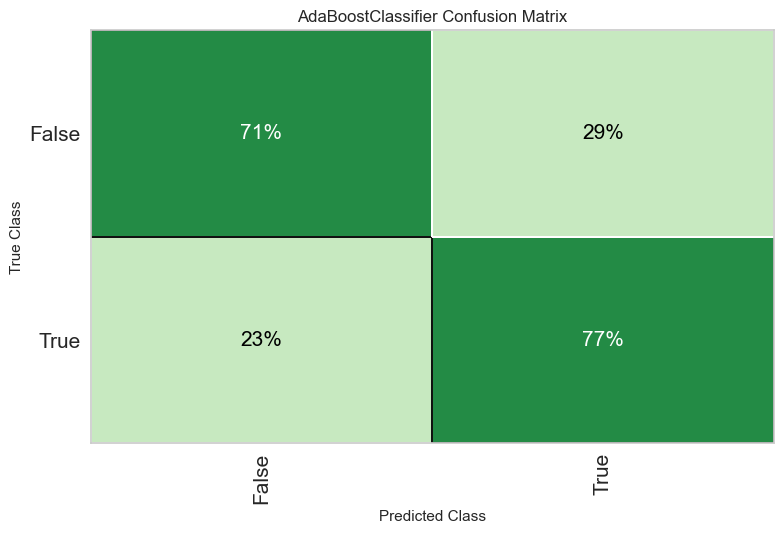

In [22]:
plot_model(boosted_best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [18]:
evaluate_model(boosted_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
deep_check(boosted_best)

c:\Users\Linds\anaconda3\envs\Capstone3\lib\site-packages\deepchecks\__init__.py:127: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

c:\Users\Linds\anaconda3\envs\Capstone3\lib\site-packages\deepchecks\suites.py:21: DeprecationWarning:

Ability to import tabular suites from the `deepchecks.suites` is deprecated, please import from `deepchecks.tabular.suites` instead



Full Suite: 
 
 
 
 36/36 [Time: 01:33, Check=Identifier Label Correlation]

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_C03Y5DW0777G2DQ4TI4TI7HW8">Full S…

## Best Approach

The most basic dataset with all RFM and Cluster information removed to prevent leakage was the most practical and realistic classifier. Random Forest scored the most favorably in AUC and Recall categories. 

Then, the 'Boosted' ensembling method was applied to the Random Forest model, where a probability threshold of .4, optimized for Recall was applied to create: meta_estimators.CustomProbabilityThresholdClassifier, which is an AdaBoost algorithm with a Random Forest base estimator and 10 n_estimators trained sequentially. 

The boosting ensemble helped the model focus on incorrect predictions. I was not suscpicous of overfitting because the  results were not abnormally good. 


## Best Model

AdaBoost to focus on errors applied to Random Forest base estimator with custom probability threshold of .40 to favor Recall. 

## Finalize Model

In [13]:
Attrition_Final = finalize_model(boosted_best)

In [17]:
save_model(Attrition_Final, 'C:/Users/Linds/Repos/Customer_Segmentation/models')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['ID', 'Recency',
                                                        'RFM_Score',
                                                        'RFM_Seg_Low',
                                                        'RFM_Seg_Top',
                                                        'RFM_Seg_Middle',
                                                        'DaysSinceCreation',
                                                        'DaysSinceFirstStay'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Attrition',
                                       time_features=[])),
                 ('imputer',
                  Si

## Business Value of Model

Current Bookings Rate

Totoal Revenues

Current Attrition Rate from 3 years of data

Average Opportunity Cost / Revenue Loss of Attrition

Potential Recovered Attrition Revenue Given that __% return twice, __% return three times . . . etc. 

Measure of Success

### Visit this data story analysis on [Tableau Public](https://public.tableau.com/app/profile/lnrobertson/viz/Hotel_Customer_Segmentation/Hotel_Customer_Segmentation?publish=yes)

* Cluster analysis visualizations
* Final analysis visualizations
* Data Flow Diagrams 
* Use and user cases
* Models and Evaluations
* Key Metrics Dashboard
* Business Value of Model

## Future Considerations

1. Add data points for more robust features
    - daily, weekly, monthly, annual snapshots with timestamps for more accurate CLV performance periods, seasonality analysis and for measuring the KPIs. 
2. Monitor KPIS more precisley
    - Attrition Rate
    - Churn/Cancel/NoShow Rate
    - New Bookings Rate
    - Revenue Change